In [3]:
from IPython.display import HTML
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# OPEN AND READ FILE xyzData.txt
with open("xyzData.txt") as file:
    xyz = np.asarray([[float(num) for num in line.split('\t')] for line in file])
dfXyz = pd.DataFrame(data=xyz[0:,0:],columns=['x','y','z']) 

In [7]:
def animate(i):
    
    while True:        
        try:
            with open("magData.txt") as file:
                mag = np.asarray([[float(num) for num in line.split('\t')] for line in file])
            dfMag = pd.DataFrame(data=mag[0:,0:],columns=['x','y','z']) # CREATE DATAFRAME FOR ARRAY
            ax.clear()    
            ax.scatter(dfXyz.x, dfXyz.y, dfXyz.z, s=40, alpha=1, color="silver")
            ax.quiver(dfXyz.x, dfXyz.y, dfXyz.z,dfMag.x, dfMag.y, dfMag.z, length=0.1, color='midnightblue', alpha=0.5)
            ax.set_title('3D - Representation', size="xx-large", family="serif", weight= "semibold")
            ax.set_xlabel('X',fontsize= 20, color="#000000", family="serif", labelpad=20)
            ax.set_ylabel('Y',fontsize= 20, color="#000000", family="serif", labelpad=20)
            ax.set_zlabel('Z',fontsize= 20, color="#000000", family="serif", labelpad=20)
            fig.canvas.draw()
            break
        except (ValueError,IndexError):
            print("Error!!!!")

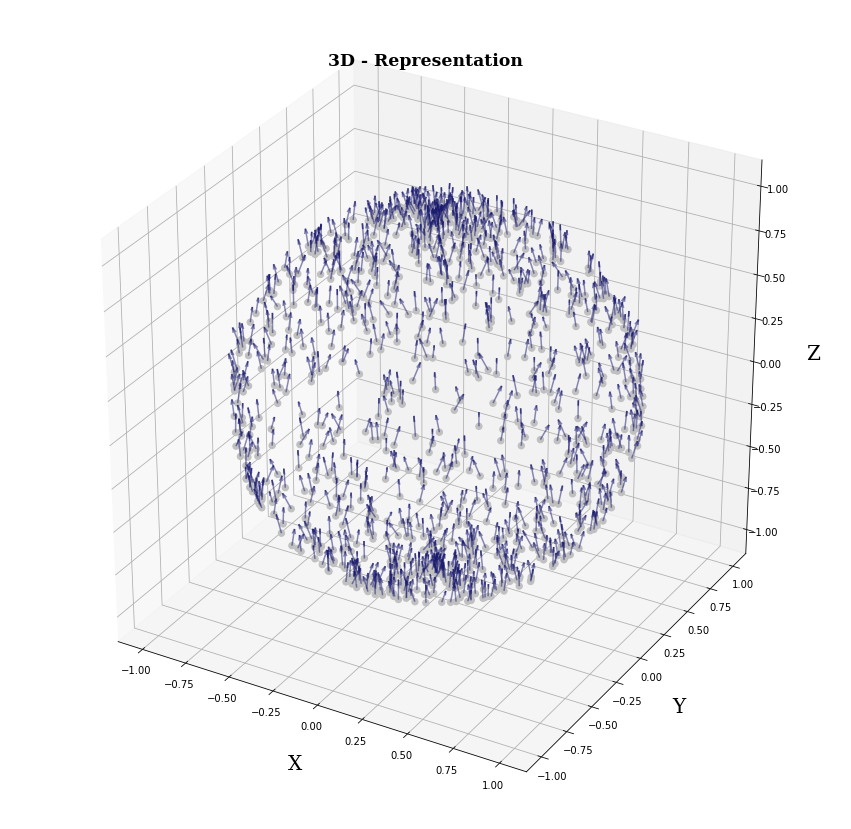

In [8]:
#%matplotlib qt 
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ani = animation.FuncAnimation(fig,animate,interval=100)
plt.show()